# Evaluating Cellular Communication Sensing for Lapse Risk Prediction

During Early Recovery from Alcohol Use Disorder

Kendra Wyant [](https://orcid.org/0000-0002-0767-7589) (Department of Psychology, University of Wisconsin-Madison)  
Coco Yu [](https://orcid.org/0000-0002-7731-0563) (Department of Psychology, University of Wisconsin-Madison)  
John J. Curtin [](https://orcid.org/0000-0002-3286-938X) (Department of Psychology, University of Wisconsin-Madison)  
January 11, 2026

Alcohol Use Disorder (AUD) is a chronic, relapsing disease. An automated recovery support system powered by personal sensing and machine learning may assist with the inherently difficult task of identifying when and why an individual is at increased risk for lapse. Cellular communication sensing may be one promising method for detecting dynamic changes in lapse risk. Moreover, these communications can be contextualized with self-reported, risk-relevant information about the contact. In this study, we evaluated the performance of a machine learning model that predicts the probability of next-day alcohol lapse among individuals (N = 144) in early recovery from AUD using contextualized cellular communication data and baseline demographic and AUD characteristics. The best-performing model used an elastic net algorithm and retained 13 features. The median posterior auROC for the best model was 0.68, with a relatively narrow 95% Bayesian confidence interval (CI; \[0.64, 0.71\]) that did not include 0.5. We also evaluated a comparison model to assess the incremental predictive value of cellular communication features beyond baseline measures. The baseline model retained five features and achieved performance nearly identical to that of the full model (median auROC = 0.68, 95% CI \[0.64, 0.71\]). These results indicate that cellular communication data capture some risk-relevant signal for alcohol lapse; however, they do not provide incremental predictive value beyond a baseline model that includes only demographic and self-report measures. Several communication features were retained in the final model with moderately sized coefficients, suggesting that aspects of social communication may be important for understanding lapse risk. Nonetheless, limitations inherent to cellular communication as a sensing method may outweigh their added value.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

# Introduction

Alcohol Use Disorder (AUD) is a chronic, relapsing disease ([Dennis & Scott, 2007](#ref-dennisManagingAddictionChronic2007); [McLellan et al., 2000](#ref-mclellanDrugDependenceChronic2000); [Rounsaville, 2010](#ref-rounsavilleLapseRelapseChasing2010)). Lapses, single episodes of alcohol use, are among the strongest predictors (and a necessary precursor) for relapse, a full return to harmful drinking ([Marlatt & Donovan, 2007](#ref-marlattRelapsePreventionSecond2007); [Marlatt & Gordon, 1985](#ref-marlattRelapsePreventionMaintenance1985)). While lapses can occur at any point in recovery, they are particularly risky during early recovery ([Daley & Douaihy, 2019](#ref-daleyReducingRiskRelapse2019)). Protective coping mechanisms and socio-environmental resources that support recovery are dynamic and accumulate over time ([Cleveland et al., 2021](#ref-clevelandRecoveryRecoveryCapital2021)). As a result, early recovery represents a critical window of vulnerability during which a lapse is more likely to escalate into relapse.

An automated recovery support system powered by personal sensing and machine learning may assist with the inherently difficult task of identifying when and why someone is at increased risk for lapse. Personal sensing of densely sampled data from individuals’ day-to-day lives can provide the inputs necessary for temporally dynamic lapse predictions ([Mohr et al., 2017](#ref-mohrPersonalSensingUnderstanding2017)). Early machine learning models using ecological momentary assessment (EMA) data have achieved excellent accuracy in predicting future lapses back to alcohol use in treatment seeking populations ([Chih et al., 2014](#ref-chihPredictiveModelingAddiction2014); [Wyant et al., 2024](#ref-wyantMachineLearningModels2024), [under review](#ref-wyantForecastingRiskAlcoholunderreview)).

Despite the high predictive success of EMA, questions remain about the long-term feasibility of self-report sensing method. EMA has been shown to be well-tolerated among substance use populations over relatively short periods of time ([Wyant et al., 2023](#ref-wyantAcceptabilityPersonalSensing2023); [**jonesComplianceEcologicalMomentary2019?**](#ref-jonesComplianceEcologicalMomentary2019)). It is unclear whether individuals would be willing and able to adhere to an extensive EMA protocol (e.g., 4 prompts per day) indefinitely. Moreover, EMA items are chosen using domain expertise from decades of research on the self-report factors that predict lapse. It is possible, however, that there are several alterntive precipitators of lapse not yet discovered due to small subtle changes in one’s environment, social circle, or lifestyle that can be easily pinpointed in self-report.

Cellular communication sensing may be a promising alternative to EMA. Whereas EMA is limited to at most several assessments per day, communication sensing is mostly passive and can be monitored moment-by-moment. Cellular communication patterns also appear to capture clear, risk-relevant constructs. Late-night phone calls could indicate an emergency, “drunk dialing,” or interpersonal conflict. A decrease in the number of contacts an individual communicates with could reflect a shrinking social circle, isolation, or disengagement.

These data may become even more powerful when communication patterns are contextualized with participant-specific meaning. For instance, knowing a participant’s relationship to their contacts, whether they have previously drank alcohol with a given contact, or whether that contact supports their recovery goals could substantially alter interpretation. In the examples above, contextualized communication data might reveal that late-night calls are made to a sponsor, or that a shrinking social circle reflects reduced contact with individuals unsupportive of their recovery. In this way, the same communication patterns may reflect protective processes rather than increased lapse risk.

In this study, we assessed whether contextualized cellular communication features contain clinically meaningful signals for predicting next-day alcohol lapse risk among individuals in early recovery from AUD. Using a machine learning model, we evaluated the predictive utility of these features and identified the most important communication features, with the goal of uncovering new, clinically meaningful predictors of lapse risk.

# Methods

## Participants and Procedure

We recruited adults in early recovery from AUD in Madison, Wisconsin, through print and digital advertisements and partnerships with treatment centers. Eligibility criteria required that participants were age 18 or older, able to read and write in English, had moderate to severe AUD [1], had a goal of abstinence from alcohol, had been abstinent for 1–8 weeks, were willing to use a single smartphone, and were not exhibiting severe psychosis or paranoia.[2]

Participants completed up to 5 study visits over approximately 3 months: a screening visit, intake visit, and 3 monthly follow-up visits. At screening we collected demographic information (age, sex at birth, race, ethnicity, education, marital status, employment, and income) and clinical characteristics (DSM-5 AUD symptom count, alcohol problems ([Hurlbut & Sher, 1992](#ref-hurlbutAssessingAlcoholProblems1992)), and presence of psychological symptoms ([Derogatis, L.R., 2000](#ref-derogatislBriefSymptomInventory))). At intake we collected additional self-report data on abstinence self-efficacy ([McKiernan et al., 2011](#ref-mckiernanDevelopmentBriefAbstinence2011)), craving ([Flannery et al., 1999](#ref-flanneryPsychometricPropertiesPenn1999)), and recent recovery efforts.

At each monthly follow-up, we downloaded backups of participants’ cellular communication metadata directly from their smartphones. Metadata included the phone number of the other party, the date and time of the communication, the origin of call or message (i.e., incoming or outgoing), whether the call was answered (voice calls only), and the duration of the call (voice calls only). During each follow-up visit, study staff identified important contacts. Contacts that participants communicated with at least twice by call or text in the past month were deemed important. For each important contact, participants answered 7 contextual questions about their type of relationship, whether they ever drank alcohol with this person, the drinking status of the contact, expectations about whether the contact would drink in their presence, recovery status of contact, level of supportiveness of contact, and affective experiences with the contact.

While enrolled, participants completed 4 brief daily ecological momentary assessments (7-10 questions). The first item assessed alcohol use (date and time of any unreported drinking episodes). Lapse reports were verified at follow-up visits using a timeline follow-back interview. Additional sensing data streams and self-report measures were collected for the parent grant. The full study protocol is available on our Open Science Framework page (<https://osf.io/wgpz9/>).

## Data Analysis Plan

Our models predicted the probability of an alcohol lapse within a 24-hour window. Predictions were generated daily at 4 a.m., beginning on participants’ second study day and continuing for up to 3 months. Participants reported the date and hour of the start and end time of any alcohol use on the first item of the EMA. Prediction windows were labeled as lapse if any alcohol use was reported in the 24-hour window. In total, there were 11,507 labeled prediction windows across all participants. Positive lapse labels were underrepresented (7.5%; 861/11,507).

We filtered the data to include only communications with known context (i.e., people with whom they communicated with at least twice in a month and whom they provided self-report context about). Cellular communication features were engineered from all available data up to the start of each window. We used six scoring epochs (6, 12, 24, 48, 72, and 168 hours before the start of the prediction window) to create features. Within each scoring epoch we calculated two types of features: raw and difference features. Raw features represent the raw feature value calculated within a scoring epoch (e.g., the rate count of text messages during the 48 hours immediately preceding the start of the prediction window). Difference features capture participant-level changes from their baseline scores. Specifically, we subtracted each participant’s mean score for each feature (using all available data prior to the prediction window) from the associated raw feature (e.g., the participant’s average rate count of text messages across all time on study subtracted from the rate count in the preceding 48 hours).

The full model included 406 features from cellular communication data plus 24 numeric or dummy-coded features from baseline self-report measures. We also evaluated a comparison model that used only the baseline features. <a href="#tbl-1" class="quarto-xref">Table 1</a> details the raw predictors, feature engineering procedures, and features included in the full vs. baseline models. Other feature engineering steps performed during cross-validation included imputing missing values (median imputation for numeric features and mode imputation for nominal features) and removing zero and near-zero variance features as determined from held-in data.

[1] (≥4 self-reported DSM-5 symptoms)

[2] Defined as scores \>2.2 or 2.8, respectively, on the psychosis or paranoia scales of the Symptom Checklist–90 ([Derogatis, L.R., 2000](#ref-derogatislBriefSymptomInventory)).

Candidate model configurations differed by algorithm (elastic net, random forest, XGBoost), outcome resampling method, and hyperparameter values. The best configuration for each model was selected using 6 repeats of participant-grouped 5-fold cross-validation. Our performance metric was area under the receiver operating curve (auROC). Folds were stratified so that all folds contained comparable proportions of individuals who lapsed frequently (i.e., 10+ times).

We evaluated model performance with a Bayesian hierarchical generalized linear model. Posterior distributions with 95% credible intervals (CI) were estimated from the 30 held-out test sets using weakly informative, data-dependent priors to regularize and reduce overfitting.[1] Random intercepts were included for repeat and fold (nested within repeat). auROCs were logit-transformed and regressed on model type to estimate the probability that model performances differed systematically.

Our best performing models used an elastic net algorithm. We quantified feature importance by examining the retained features (i.e., coefficient value \> 0) in the full model and ordering them by absolute coefficient value. These values provide an estimate of the direction and magnitude of association between each predictor and the outcome, conditional on the other features retained. All our annotated analysis scripts are publicly available on our study website (<https://jjcurtin.github.io/study_messages/>).

``` python
feats |> 
  knitr::kable() |> 
  kable_classic() 
```

| Raw Predictor | Response Options | Feature Engineering | Scoring Epochs | Total Features | Full Model | Baseline Model |
|:---|:---|:---|:---|---:|:---|:---|
| Originated | Incoming, outgoing | Difference and raw rate counts for text messages and voice calls | 6, 12, 24, 48, 72, and 168 hours | 48 | Yes | No |
| Call duration | Duration (in minutes) | Difference and raw rate sums of duration, difference and raw most recent duration | 6, 12, 24, 48, 72, and 168 hours | 14 | Yes | No |
| Call answered | Yes, no | Difference and raw rate counts for unanswered incoming voice calls | 6, 12, 24, 48, 72, and 168 hours | 12 | Yes | No |
| Date/time of communication | Date and time | Difference and raw rate counts for text messages and voice calls at night (10 pm – 6am) and on weekends | 24, 48, 72, and 168 hours (night), 168 hours (weekend) | 20 | Yes | No |
| Phone number | Phone number | Difference and raw rate counts of unique phone numbers | 6, 12, 24, 48, 72, and 168 hours | 12 | Yes | No |
| Type of Relationship | Family, friend, counselor or social worker, co-worker | Difference and raw rate counts of unique phone numbers | 6, 12, 24, 48, 72, and 168 hours | 48 | Yes | No |
| Have you drank alcohol with this person? | Never/almost never, occasionally, almost always/always | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 36 | Yes | No |
| What is their drinking status? | Drinker, non-drinker, don’t know | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 36 | Yes | No |
| Would you expect them to drink in your presence? | Yes, no, uncertain | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 36 | Yes | No |
| Are they currently in recovery from drugs or alcohol? | Yes, no, don’t know | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 36 | Yes | No |
| Are they supportive about your recovery goals? | Supportive, unsupportive, mixed, neutral, don’t know | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 60 | Yes | No |
| How are your typical experiences with this person? | Pleasant, unpleasant, mixed, neutral | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 48 | Yes | No |
| DSM-5 symptom count | Numeric (4-11) |  |  | 1 | Yes | Yes |
| Past year alcohol problems | Numeric (0-27) |  |  | 1 | Yes | Yes |
| Craving | Numeric (0-30) |  |  | 1 | Yes | Yes |
| Abstinence self-efficacy: Negative affect, social, physical, and craving subscales | Numeric (0-20) |  |  | 4 | Yes | Yes |
| Number of individual alcohol counseling sessions attended (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Number of group alcohol counseling sessions attended (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Number of self-help group meetings attended (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Number of other mental health counseling sessions attended (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Number of days in contact with supportive people (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Number of days in contact with unsupportive people (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Taken prescribed medication for alcohol use disorder (past 30 days) | Yes, no | Dummy coded |  | 1 | Yes | Yes |
| Taken prescribed medication for other mental health disorder (past 30 days) | Yes, no | Dummy coded |  | 1 | Yes | Yes |
| Satisfaction with progress toward recovery goals (past 30 days) | Numeric (0-4) |  |  | 1 | Yes | Yes |
| Confidence in abstinence ability (next 30 days) | Numeric (0-4) |  |  | 1 | Yes | Yes |
| Has a goal of abstinence | Yes, no, uncertain | Dummy coded |  | 2 | Yes | Yes |
| Age | Numeric (years) |  |  | 1 | Yes | Yes |
| Sex at birth | Male, female | Dummy coded |  | 1 | Yes | Yes |
| Race | Non-Hispanic White, non-White and/or Hispanic | Dummy coded |  | 1 | Yes | Yes |
| Education | High school or less, some college, college degree | Dummy coded |  | 2 | Yes | Yes |
| Income | Numeric (dollars) |  |  | 1 | Yes | Yes |
| Marital Status | Married, not married, other | Dummy coded |  | 2 | Yes | Yes |

Table 1: Feature Engineering of Raw Predictors

## Ethical Considerations

All procedures were approved by the University of Wisconsin-Madison Institutional Review Board (Study #2015-0780). All participants provided written informed consent.

# Results

## Participants

We screened 192 participants. Of these, 169 enrolled and 154 completed the first follow-up visit. Data from 1 participant was excluded due to not reporting a goal of abstinence and lapsing multiple times a day every day on study. Data from 1 participant was excluded due to evidence of careless responding. Data from 1 participant was excluded due to poor compliance with EMA resulting in questionable lapse labels. Data from 7 participants were excluded due to poor compliance providing communication data (i.e., deleting logs prior to download and/or not providing context information about important contacts). The final analytic sample included 144 participants. <a href="#tbl-2" class="quarto-xref">Table 2</a> provides the demographic characterization of our sample. 56% of participants reported at least one lapse while on study.

``` python
footnote_table_dem_a <- "N = 144"


table_dem |> 
  knitr::kable() |> 
  kable_classic() |> 
  kableExtra::group_rows(start_row = 3, end_row = 4) |> 
  kableExtra::group_rows(start_row = 6, end_row = 10) |> 
  kableExtra::group_rows(start_row = 12, end_row = 13) |> 
  kableExtra::group_rows(start_row = 15, end_row = 20) |> 
  kableExtra::group_rows(start_row = 22, end_row = 30) |> 
  kableExtra::group_rows(start_row = 33, end_row = 37) |> 
  kableExtra::footnote(general = c(footnote_table_dem_a), escape=FALSE)
```

|  | N | % | M | SD | Range |
|:---|---:|---:|:---|:---|:---|
| Age |  |  | 40.4 | 11.8 | 21-72 |
| Sex at Birth |  |  |  |  |  |
|  |  |  |  |  |  |
| Female | 74 | 51.4 |  |  |  |
| Male | 70 | 48.6 |  |  |  |
| Race |  |  |  |  |  |
|  |  |  |  |  |  |
| American Indian/Alaska Native | 3 | 2.1 |  |  |  |
| Asian | 2 | 1.4 |  |  |  |
| Black/African American | 8 | 5.6 |  |  |  |
| White/Caucasian | 125 | 86.8 |  |  |  |
| Other/Multiracial | 6 | 4.2 |  |  |  |
| Hispanic, Latino, or Spanish origin |  |  |  |  |  |
|  |  |  |  |  |  |
| Yes | 3 | 2.1 |  |  |  |
| No | 141 | 97.9 |  |  |  |
| Education |  |  |  |  |  |
|  |  |  |  |  |  |
| Less than high school or GED degree | 1 | 0.7 |  |  |  |
| High school or GED | 14 | 9.7 |  |  |  |
| Some college | 39 | 27.1 |  |  |  |
| 2-Year degree | 13 | 9.0 |  |  |  |
| College degree | 55 | 38.2 |  |  |  |
| Advanced degree | 22 | 15.3 |  |  |  |
| Employment |  |  |  |  |  |
|  |  |  |  |  |  |
| Employed full-time | 70 | 48.6 |  |  |  |
| Employed part-time | 25 | 17.4 |  |  |  |
| Full-time student | 7 | 4.9 |  |  |  |
| Homemaker | 1 | 0.7 |  |  |  |
| Disabled | 7 | 4.9 |  |  |  |
| Retired | 8 | 5.6 |  |  |  |
| Unemployed | 15 | 10.4 |  |  |  |
| Temporarily laid off, sick leave, or maternity leave | 3 | 2.1 |  |  |  |
| Other, not otherwise specified | 8 | 5.6 |  |  |  |
| Personal Income |  |  | \$35,050 | \$32,069 | \$0-200,000 |
| Marital Status |  |  |  |  |  |
|  |  |  |  |  |  |
| Never married | 63 | 43.8 |  |  |  |
| Married | 32 | 22.2 |  |  |  |
| Divorced | 42 | 29.2 |  |  |  |
| Separated | 5 | 3.5 |  |  |  |
| Widowed | 2 | 1.4 |  |  |  |
| <span style="font-style: italic;">Note: </span> |  |  |  |  |  |
|  N = 144 |  |  |  |  |  |

Table 2: Demographics

## Communications

Participants had an average of 26 important contacts (range 2-113) that were contextualized with self-report information. We obtained a total of 375,912 contextualized communications across participants. Participants had, on average, 2,610 contextualized communications (range = 109-14,225) averaging to about 33 communications per day (range 3-278).

## Model Evaluation

The median posterior auROC for the full model was 0.68, with relatively narrow 95% CI (\[0.64, 0.71\]) that did not contain .5. This provides strong evidence that the model is capturing signal in the data. The final model retained 13 features (<a href="#fig-1" class="quarto-xref">Figure 1</a>). The top four were baseline measures of abstinence confidence, having a goal of abstinence, abstinence self-efficacy when experiencing negative affect, and craving. Communication frequency with people unaware of the individual’s recovery goals also emerged as an important feature associated with increased lapse risk.

We evaluated a comparison model to assess the incremental predictive value of cellular communication features beyond baseline measures. The baseline model retained 5 features and achieved performance nearly identical to the full model (median auROC = 0.68, 95% CI \[0.64, 0.71\]). The median difference in auROC between the full and baseline models was less than .01, providing no evidence (52% probability) that the full model performed better than the baseline model. <!--I think this is the probasbilityh that the full model performed better than the baseline model.  Bit surprised that its even .52 given how close they auROCs are. Are you sure about that?--> <!--KW: yes you are right I updated the wording. As far as probability being .52 this is accurate. .50 would mean its essentially a coin flip for which model performs better (i.e., they pretty much perform the same) so .52 seems expected to me.  If probability was 0 that would actually mean the baseline model was performing better than the full model-->

[1] Residual SD ~ normal(0, exp(2)); intercept (centered predictors) ~ normal(2.3, 1.3); window-width contrasts ~ normal(0, 2.69); covariance ~ decov(1,1,1,1).

``` python
feat_imp 
```

<figure id="fig-1">
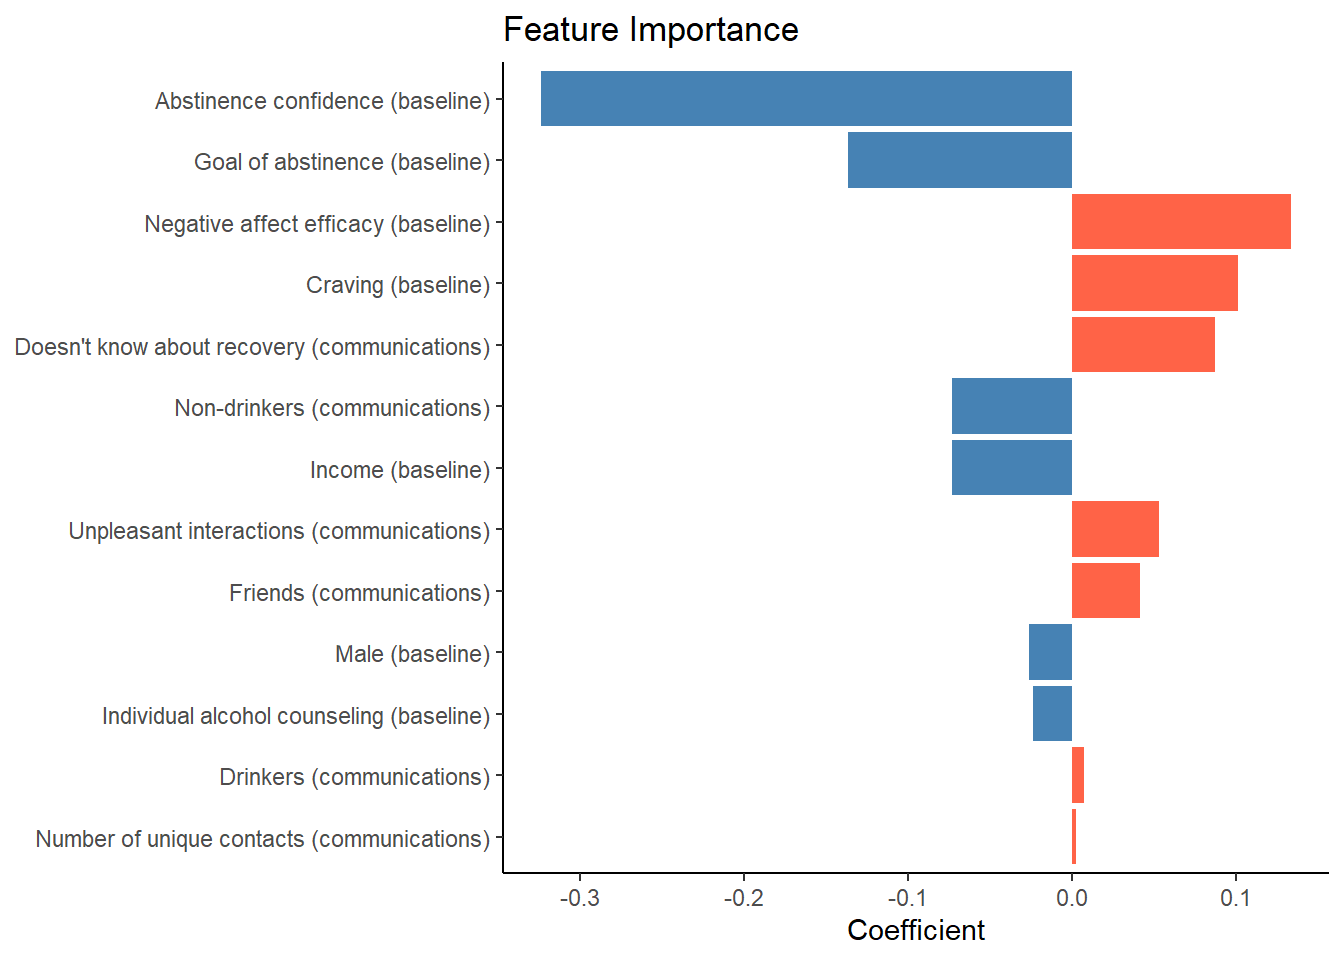
<figcaption>Figure 1: Global feature importance (elastic net coefficient) for the full model. Features are ordered by absolute coefficient value. Blue bars indicate higher feature values, on average, lower lapse risk. Red bars indicate higher feature values, on average, increase risk. Baseline features were collected from self-report measures at the start of the study. Communication features were engineered from the contexualized cellular communications.</figcaption>
</figure>

# Discussion

Our model achieved fair performance, with an auROC of 0.68, indicating that some predictive signal was present. However, it did not offer incremental value beyond a baseline model that included only demographic and self-report measures. Consistent with this, the four most important predictors in our model were all self-report variables: abstinence confidence, abstinence goal, negative affect efficacy, and craving.

Nonetheless, several communication features were retained in the final model with moderately sized coefficients. These included communications with people unaware of the participant’s recovery status, non-drinkers, friends, and individuals who were unpleasant to interact with. In contrast, raw counts of calls and text messages and call durations were not retained in the final model. This implies that the quantity of communication may be less informative than the quality and social significance. Future research may benefit from collecting richer contextual data about communication contacts to better understand the social dynamics contributing to lapse risk.

Even with highly contextualized communication data, however, prediction may be limited by data sparsity. Many participants had few daily communications, and some had extended periods with no recorded interactions at all. Our study design may have further contributed to this limitation. We collected only phone and SMS text communications through the native smartphone app. In recent years, many individuals use private messaging apps (e.g., WhatsApp, Signal) or social media platforms (e.g., Facebook Messenger, Instagram) as their primary communication method ([McDowell et al., 2025](#ref-mcdowellPreferencesAttitudesDigital2025)). Therefore, our dataset likely missed a substantial portion of participants’ communications. Notably, the communication features that were retained in the final model were scored over the longest scoring epochs (72 and 168 hours), suggesting that when more data are available (i.e., more communications) these features may be become more important.<!--KW: John, I added this sentence but let me know if you think it needs more explanation or doesn't fit here.--> Future studies could explore whether increasing communication data from these alternative platforms yield stronger predictive signals.

We cannot entirely dismiss the potential value of cellular communication data for risk prediction. For example, researchers have successfully incorporated communication data into models with other sensing data (e.g., accelerometer, geolocation, and device usage) to detect current ([S. Bae et al., 2017](#ref-baeDetectingDrinkingEpisodes2017)) and predict future ([S. W. Bae et al., 2023](#ref-baeLeveragingMobilePhone2023)) heavy drinking episondes in non-treatment seeking young adult populations. However, even in these instances, the unique contribution of cellular communications is unclear. Some communication features, such as outgoing call duration and the number of outgoing calls emerged in the top 20 important features for detecting current drinking episodes. Conversely, when predicting future drinking episodes, no communication features appeared in the top 20. Other sensing methods, like geolocation and accelerometer data, appeared to be more robustly important for both detection and prediction.

Other practical challenges in collecting call and text message data further limit the feasibility of this sensing method. For example, we obtained participants’ cellular communication data by downloading backups of their communication logs in person during their monthly follow-up visits. However, Apple heavily restricts apps in its app store from accessing call and text message data, making real-time sensing of communications challenging (if not impossible) for IOS users. We conclude that other forms of social interaction characterization (e.g., engineering time spent with supportive contacts from geolocation data) are more worthwhile to pursue in future research.

Bae, S. W., Suffoletto, B., Zhang, T., Chung, T., Ozolcer, M., Islam, M. R., & Dey, A. (2023). Leveraging Mobile Phone Sensors, Machine Learning and Explainable Artificial Intelligence to Predict Imminent Same-Day Binge Drinking Events to Support Just-In-Time Adaptive Interventions: A Feasibility Study. *JMIR Formative Research*. <https://doi.org/10.2196/39862>

Bae, S., Ferreira, D., Suffoletto, B., Puyana, J. C., Kurtz, R., Chung, T., & Dey, A. K. (2017). Detecting Drinking Episodes in <span class="nocase">Young Adults Using Smartphone-based Sensors</span>. *Proceedings of the ACM on Interactive, Mobile, Wearable and Ubiquitous Technologies*, *1*(2), 1–36. <https://doi.org/10.1145/3090051>

Chih, M.-Y., Patton, T., McTavish, F. M., Isham, A. J., Judkins-Fisher, C. L., Atwood, A. K., & Gustafson, D. H. (2014). Predictive modeling of addiction lapses in a mobile health application. *Journal of Substance Abuse Treatment*, *46*(1), 29–35. <https://doi.org/10.1016/j.jsat.2013.08.004>

Cleveland, H. H., Brick, T. R., Knapp, K. S., & Croff, J. M. (2021). Recovery and Recovery Capital: Aligning Measurement with Theory and Practice. In J. M. Croff & J. Beaman (Eds.), *Family Resilience and Recovery from Opioids and Other Addictions* (pp. 109–128). Springer International Publishing. <https://doi.org/10.1007/978-3-030-56958-7_6>

Daley, D. C., & Douaihy, A. (2019). Reducing the Risk of Relapse. In D. C. Daley, A. B. Douaihy, D. C. Daley, & A. Douaihy (Eds.), *Managing Substance Use Disorder: Practitioner Guide* (p. 0). Oxford University Press. <https://doi.org/10.1093/med-psych/9780190926717.003.0018>

Dennis, M., & Scott, C. K. (2007). [Managing Addiction as a Chronic Condition](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2797101). *Addiction Science & Clinical Practice*, *4*(1), 45–55.

Derogatis, L.R. (2000). *Brief Symptom Inventory 18 - Administration, scoring, and procedures manual*. NCS Pearson.

Flannery, B. A., Volpicelli, J. R., & Pettinati, H. M. (1999). [Psychometric properties of the Penn Alcohol Craving Scale](https://www.ncbi.nlm.nih.gov/pubmed/10470970). *Alcoholism, Clinical and Experimental Research*, *23*(8), 1289–1295.

Hurlbut, S. C., & Sher, K. J. (1992). Assessing alcohol problems in college students. *Journal of American College Health.*, *41*(2), 49–58.

Marlatt, G. A., & Donovan, D. M. (Eds.). (2007). *Relapse Prevention, Second Edition: Maintenance Strategies in the Treatment of Addictive Behaviors* (2nd edition). The Guilford Press.

Marlatt, G. A., & Gordon, J. R. (Eds.). (1985). *Relapse Prevention: Maintenance Strategies in the Treatment of Addictive Behaviors* (First edition). The Guilford Press.

McDowell, B., Dumais, K. M., Gary, S. T., de Gooijer, I., & Ward, T. (2025). Preferences and Attitudes Towards Digital Communication and Symptom Reporting Methods in Clinical Trials. *Patient Preference and Adherence*, *19*, 255–263. <https://doi.org/10.2147/PPA.S474535>

McKiernan, P., Cloud, R., Patterson, D. A., Wolf, S., Golder, S., & Besel, K. (2011). Development of a Brief Abstinence Self-Efficacy Measure. *Journal of Social Work Practice in the Addictions*, *11*(3), 245–253. <https://doi.org/10.1080/1533256X.2011.593445>

McLellan, A. T., Lewis, D. C., O’Brien, C. P., & Kleber, H. D. (2000). Drug dependence, a chronic medical illness: Implications for treatment, insurance, and outcomes evaluation. *JAMA*, *284*(13), 1689–1695. <https://doi.org/10.1001/jama.284.13.1689>

Mohr, D. C., Zhang, M., & Schueller, S. M. (2017). Personal Sensing: Understanding Mental Health Using Ubiquitous Sensors and Machine Learning. *Annual Review of Clinical Psychology*, *13*(1), 23–47. <https://doi.org/10.1146/annurev-clinpsy-032816-044949>

Rounsaville, D. B. (2010). *Lapse, Relapse, and Chasing the Wagon: Post-Treatment Drinking and Recovery* \[PhD thesis\]. University of Maryland, Baltimore County.

Wyant, K., Fronk, G. E., Yu, C., Punturieri, C. E., & Curtin, J. J. (under review). *Forecasting Risk of Alcohol Lapse up to Two Weeks in Advance using <span class="nocase">Time-lagged Machine Learning Models</span>*.

Wyant, K., Moshontz, H., Ward, S. B., Fronk, G. E., & Curtin, J. J. (2023). Acceptability of Personal Sensing Among People With Alcohol Use Disorder: Observational Study. *JMIR mHealth and uHealth*, *11*(1), e41833. <https://doi.org/10.2196/41833>

Wyant, K., Sant’Ana, S. J., Fronk, G. E., & Curtin, J. J. (2024). Machine learning models for temporally precise lapse prediction in alcohol use disorder. *Journal of Psychopathology and Clinical Science*, *133*(7), 527–540. <https://doi.org/10.1037/abn0000901>